# Test code for 1 analysis

In [ ]:
# Import required libraries
import MDAnalysis as mda
import matplotlib.pyplot as plt
import numpy as np
import os

# Define directories and file paths
topology_file = "/home/hh2635/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/equil/kalj_T0.5_n360_v300_10000000_1.lammpstrj"
trajectory_file = "/home/hh2635/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/prod/kalj_T0.5_n360_v300_prod_10000000_1.unwrap.dcd"
analysis_dir = "/home/hh2635/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Analysis"
figures_dir = os.path.join(analysis_dir, "Figures")

# Create Analysis and Figures directories if they don't exist
os.makedirs(figures_dir, exist_ok=True)

# Load the universe with topology and trajectory
u = mda.Universe(topology_file, trajectory_file, topology_format="LAMMPSDUMP")

# ----- Mean-Squared Displacement (MSD) Calculation -----
def calculate_msd(universe):
    # Select all atoms
    atoms = universe.select_atoms("all")
    
    # Get the number of atoms and frames
    num_atoms = len(atoms)
    num_frames = len(universe.trajectory)
    
    # Initialize an array to store MSD values
    msd = np.zeros(num_frames)
    
    # Get initial positions
    initial_positions = atoms.positions.copy()
    
    for i, ts in enumerate(universe.trajectory):
        # Calculate displacement from initial positions
        displacements = atoms.positions - initial_positions
        squared_displacements = np.sum(displacements ** 2, axis=1)
        msd[i] = np.mean(squared_displacements)
    
    # Time array
    time = np.arange(num_frames) * universe.trajectory.dt
    return time, msd

# Run MSD calculation
time, msd_data = calculate_msd(u)

# Save MSD Plot
plt.figure(figsize=(8, 6))
plt.plot(time, msd_data, label="MSD")
plt.xlabel("Time (ps)")
plt.ylabel("Mean-Squared Displacement (Å^2)")
plt.title("Mean-Squared Displacement (MSD) over Time")
plt.legend()
msd_plot_path = os.path.join(figures_dir, "MSD_T0.5.png")
plt.savefig(msd_plot_path)
plt.close()

print(f"MSD plot saved to {msd_plot_path}")

# ----- Radial Distribution Function (RDF) Calculation -----
# Determine half of the box size (assumes cubic box)
box_size = u.dimensions[0]  # You may need to adjust if non-cubic
rdf_range = (0.0, box_size / 2)

# Select atoms by type
type1_atoms = u.select_atoms("type 1")
type2_atoms = u.select_atoms("type 2")

# Calculate RDF for type 1 - type 1
rdf_11 = mda.analysis.rdf.InterRDF(type1_atoms, type1_atoms, nbins=75, range=rdf_range)
rdf_11.run()

# Calculate RDF for type 2 - type 2
rdf_22 = mda.analysis.rdf.InterRDF(type2_atoms, type2_atoms, nbins=75, range=rdf_range)
rdf_22.run()

# Calculate RDF for type 1 - type 2
rdf_12 = mda.analysis.rdf.InterRDF(type1_atoms, type2_atoms, nbins=75, range=rdf_range)
rdf_12.run()

# Save RDF Plots
# RDF g_11(r)
plt.figure(figsize=(8, 6))
plt.plot(rdf_11.results.bins, rdf_11.results.rdf, label="g_11(r)")
plt.xlabel("r (Å)")
plt.ylabel("g(r)")
plt.title("Radial Distribution Function g_11(r) for Type 1 - Type 1")
plt.legend()
rdf_11_plot_path = os.path.join(figures_dir, "RDF_g11_T0.5.png")
plt.savefig(rdf_11_plot_path)
plt.close()

print(f"RDF g_11 plot saved to {rdf_11_plot_path}")

# RDF g_22(r)
plt.figure(figsize=(8, 6))
plt.plot(rdf_22.results.bins, rdf_22.results.rdf, label="g_22(r)", color="orange")
plt.xlabel("r (Å)")
plt.ylabel("g(r)")
plt.title("Radial Distribution Function g_22(r) for Type 2 - Type 2")
plt.legend()
rdf_22_plot_path = os.path.join(figures_dir, "RDF_g22_T0.5.png")
plt.savefig(rdf_22_plot_path)
plt.close()

print(f"RDF g_22 plot saved to {rdf_22_plot_path}")

# RDF g_12(r)
plt.figure(figsize=(8, 6))
plt.plot(rdf_12.results.bins, rdf_12.results.rdf, label="g_12(r)", color="green")
plt.xlabel("r (Å)")
plt.ylabel("g(r)")
plt.title("Radial Distribution Function g_12(r) for Type 1 - Type 2")
plt.legend()
rdf_12_plot_path = os.path.join(figures_dir, "RDF_g12_T0.5.png")
plt.savefig(rdf_12_plot_path)
plt.close()

print(f"RDF g_12 plot saved to {rdf_12_plot_path}")

print("Completed analysis for T=0.5")

# Loop over all files

In [10]:
# Import required libraries
import MDAnalysis as mda
import matplotlib.pyplot as plt
import numpy as np
import os
import re

# Define directories
data_dir = "/home/hh2635/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/prod"
equil_dir = "/home/hh2635/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/equil"
analysis_dir = "/home/hh2635/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Analysis"
figures_dir = os.path.join(analysis_dir, "Figures")

# Create Analysis and Figures directories if they don't exist
os.makedirs(figures_dir, exist_ok=True)

# Function to find corresponding topology file in the equil directory
def find_topology_file(temp):
    pattern = f"kalj_T{temp}_n360_v300_.*.lammpstrj"
    for file in os.listdir(equil_dir):
        if re.match(pattern, file):
            return os.path.join(equil_dir, file)
    return None

# Function to calculate MSD
def calculate_msd(universe):
    atoms = universe.select_atoms("all")
    num_frames = len(universe.trajectory)
    msd = np.zeros(num_frames)
    initial_positions = atoms.positions.copy()
    
    for i, ts in enumerate(universe.trajectory):
        displacements = atoms.positions - initial_positions
        squared_displacements = np.sum(displacements ** 2, axis=1)
        msd[i] = np.mean(squared_displacements)
    
    time = np.arange(num_frames) * universe.trajectory.dt
    return time, msd

# Loop over all production files in `prod` directory
for filename in os.listdir(data_dir):
    if filename.endswith(".unwrap.dcd"):
        # Extract the temperature from the filename (e.g., T0.5, T1.0, etc.)
        match = re.search(r'T([0-9.]+)', filename)
        if match:
            temp = match.group(1)
        
        # Define the trajectory file path
        trajectory_file = os.path.join(data_dir, filename)
        
        # Find the matching topology file in the equil directory
        topology_file = find_topology_file(temp)
        if topology_file is None:
            print(f"No matching topology file found for temperature T={temp}. Skipping this file.")
            continue
        
        # Load the universe with topology and trajectory
        u = mda.Universe(topology_file, trajectory_file, topology_format="LAMMPSDUMP")
        
        # ----- Mean-Squared Displacement (MSD) Calculation -----
        time, msd_data = calculate_msd(u)

        # Save MSD Plot
        plt.figure(figsize=(8, 6))
        plt.plot(time, msd_data, label="MSD")
        plt.xlabel("Time (ps)")
        plt.ylabel("Mean-Squared Displacement (Å^2)")
        plt.title(f"Mean-Squared Displacement (MSD) over Time for T={temp}")
        plt.legend()
        msd_plot_path = os.path.join(figures_dir, f"MSD_T{temp}.png")
        plt.savefig(msd_plot_path)
        plt.close()
        
        print(f"MSD plot saved to {msd_plot_path}")

        # ----- Radial Distribution Function (RDF) Calculation -----
        box_size = u.dimensions[0]
        rdf_range = (0.0, box_size / 2)

        # Select atoms by type
        type1_atoms = u.select_atoms("type 1")
        type2_atoms = u.select_atoms("type 2")

        # Calculate RDF for type 1 - type 1
        rdf_11 = mda.analysis.rdf.InterRDF(type1_atoms, type1_atoms, nbins=75, range=rdf_range)
        rdf_11.run()

        # Calculate RDF for type 2 - type 2
        rdf_22 = mda.analysis.rdf.InterRDF(type2_atoms, type2_atoms, nbins=75, range=rdf_range)
        rdf_22.run()

        # Calculate RDF for type 1 - type 2
        rdf_12 = mda.analysis.rdf.InterRDF(type1_atoms, type2_atoms, nbins=75, range=rdf_range)
        rdf_12.run()

        # Save RDF Plots
        # RDF g_11(r)
        plt.figure(figsize=(8, 6))
        plt.plot(rdf_11.results.bins, rdf_11.results.rdf, label="g_11(r)")
        plt.xlabel("r (Å)")
        plt.ylabel("g(r)")
        plt.title(f"Radial Distribution Function g_11(r) for Type 1 - Type 1 at T={temp}")
        plt.legend()
        rdf_11_plot_path = os.path.join(figures_dir, f"RDF_g11_T{temp}.png")
        plt.savefig(rdf_11_plot_path)
        plt.close()

        print(f"RDF g_11 plot saved to {rdf_11_plot_path}")

        # RDF g_22(r)
        plt.figure(figsize=(8, 6))
        plt.plot(rdf_22.results.bins, rdf_22.results.rdf, label="g_22(r)", color="orange")
        plt.xlabel("r (Å)")
        plt.ylabel("g(r)")
        plt.title(f"Radial Distribution Function g_22(r) for Type 2 - Type 2 at T={temp}")
        plt.legend()
        rdf_22_plot_path = os.path.join(figures_dir, f"RDF_g22_T{temp}.png")
        plt.savefig(rdf_22_plot_path)
        plt.close()

        print(f"RDF g_22 plot saved to {rdf_22_plot_path}")

        # RDF g_12(r)
        plt.figure(figsize=(8, 6))
        plt.plot(rdf_12.results.bins, rdf_12.results.rdf, label="g_12(r)", color="green")
        plt.xlabel("r (Å)")
        plt.ylabel("g(r)")
        plt.title(f"Radial Distribution Function g_12(r) for Type 1 - Type 2 at T={temp}")
        plt.legend()
        rdf_12_plot_path = os.path.join(figures_dir, f"RDF_g12_T{temp}.png")
        plt.savefig(rdf_12_plot_path)
        plt.close()

        print(f"RDF g_12 plot saved to {rdf_12_plot_path}")

        print(f"Completed analysis for T={temp}\n")

MSD plot saved to /home/hh2635/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Analysis/Figures/MSD_T0.55.png
RDF g_11 plot saved to /home/hh2635/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Analysis/Figures/RDF_g11_T0.55.png
RDF g_22 plot saved to /home/hh2635/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Analysis/Figures/RDF_g22_T0.55.png
RDF g_12 plot saved to /home/hh2635/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Analysis/Figures/RDF_g12_T0.55.png
Completed analysis for T=0.55

MSD plot saved to /home/hh2635/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Analysis/Figures/MSD_T0.65.png
RDF g_11 plot saved to /home/hh2635/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Analysis/Figures/RDF_g11_T0.65.png
RDF g_22 plot saved to /home/hh2635/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Analysis/Figures/RDF_g22_T0.65.png
RDF g_12 plot saved t

# MSD for type 1 partcle

In [11]:
# Import required libraries
import MDAnalysis as mda
import matplotlib.pyplot as plt
import numpy as np
import os
import re

# Define directories
data_dir = "/home/hh2635/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/prod"
equil_dir = "/home/hh2635/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/equil"
analysis_dir = "/home/hh2635/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Analysis"
figures_dir = os.path.join(analysis_dir, "Figures")

# Create Analysis and Figures directories if they don't exist
os.makedirs(figures_dir, exist_ok=True)

# Function to find corresponding topology file in the equil directory
def find_topology_file(temp):
    pattern = f"kalj_T{temp}_n360_v300_.*.lammpstrj"
    for file in os.listdir(equil_dir):
        if re.match(pattern, file):
            return os.path.join(equil_dir, file)
    return None

# Function to calculate MSD for type 1 particles
def calculate_msd_type1(universe):
    type1_atoms = universe.select_atoms("type 1")
    num_frames = len(universe.trajectory)
    msd = np.zeros(num_frames)
    initial_positions = type1_atoms.positions.copy()
    
    for i, ts in enumerate(universe.trajectory):
        displacements = type1_atoms.positions - initial_positions
        squared_displacements = np.sum(displacements ** 2, axis=1)
        msd[i] = np.mean(squared_displacements)
    
    time = np.arange(num_frames) * universe.trajectory.dt
    return time, msd

# Dictionary to store MSD data for each temperature
msd_data_by_temp = {}

# Loop over all production files in `prod` directory
for filename in os.listdir(data_dir):
    if filename.endswith(".unwrap.dcd"):
        # Extract the temperature from the filename (e.g., T0.5, T1.0, etc.)
        match = re.search(r'T([0-9.]+)', filename)
        if match:
            temp = match.group(1)
        
        # Define the trajectory file path
        trajectory_file = os.path.join(data_dir, filename)
        
        # Find the matching topology file in the equil directory
        topology_file = find_topology_file(temp)
        if topology_file is None:
            print(f"No matching topology file found for temperature T={temp}. Skipping this file.")
            continue
        
        # Load the universe with topology and trajectory
        u = mda.Universe(topology_file, trajectory_file, topology_format="LAMMPSDUMP")
        
        # Calculate MSD for type 1 particles
        time, msd_data = calculate_msd_type1(u)
        
        # Store MSD data for this temperature
        msd_data_by_temp[temp] = (time, msd_data)

# Plot MSD for each temperature on a log-log scale
plt.figure(figsize=(10, 8))
for temp, (time, msd_data) in msd_data_by_temp.items():
    plt.loglog(time, msd_data, label=f"T={temp}")

plt.xlabel("Time (ps)")
plt.ylabel("Mean-Squared Displacement (Å^2)")
plt.title("Mean-Squared Displacement (MSD) for Type 1 Particles at Various Temperatures")
plt.legend()
msd_loglog_plot_path = os.path.join(figures_dir, "MSD_Type1_loglog.png")
plt.savefig(msd_loglog_plot_path)
plt.close()

print(f"Log-log MSD plot saved to {msd_loglog_plot_path}")

Log-log MSD plot saved to /home/hh2635/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Analysis/Figures/MSD_Type1_loglog.png


# MSD=1

Temperature 0.55: Time for MSD=1 is 22.596 ps
Temperature 0.65: Time for MSD=1 is 3.425 ps
Temperature 0.8: Time for MSD=1 is 1.507 ps
MSD does not reach 1.0 for T=1.5, max MSD = 0.9813849329948425
Temperature 0.7: Time for MSD=1 is 2.876 ps
Temperature 0.6: Time for MSD=1 is 4.555 ps
Temperature 1.0: Time for MSD=1 is 0.825 ps
Temperature 0.9: Time for MSD=1 is 0.972 ps
Temperature 0.5: Time for MSD=1 is 42.529 ps
Temperature 0.475: Time for MSD=1 is 142.468 ps
MSD times for each temperature: {0.55: array(22.59558446), 0.65: array(3.42539402), 0.8: array(1.50695034), 1.5: nan, 0.7: array(2.87618265), 0.6: array(4.55463193), 1.0: array(0.82546573), 0.9: array(0.97164407), 0.5: array(42.52941764), 0.475: array(142.468095)}


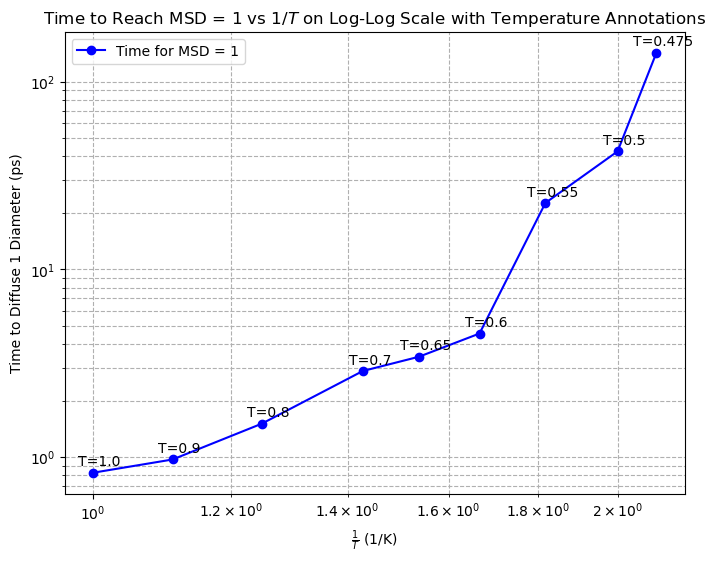

Annotated plot saved with temperature labels.


In [22]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import os

# Paths to directories
topology_dir = "/home/hh2635/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/equil"
trajectory_dir = "/home/hh2635/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/prod"
figures_dir = "/home/hh2635/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Analysis/Figures"
os.makedirs(figures_dir, exist_ok=True)

# Temperatures and filenames
temperature_file_map = {
    0.55: ("kalj_T0.55_n360_v300_3000000_1.lammpstrj", "kalj_T0.55_n360_v300_prod_3000000_1.unwrap.dcd"),
    0.65: ("kalj_T0.65_n360_v300_350000_1.lammpstrj", "kalj_T0.65_n360_v300_prod_350000_1.unwrap.dcd"),
    0.8: ("kalj_T0.8_n360_v300_150000_1.lammpstrj", "kalj_T0.8_n360_v300_prod_150000_1.unwrap.dcd"),
    1.5: ("kalj_T1.5_n360_v300_10000_1.lammpstrj", "kalj_T1.5_n360_v300_prod_10000_1.unwrap.dcd"),
    0.7: ("kalj_T0.7_n360_v300_180000_1.lammpstrj", "kalj_T0.7_n360_v300_prod_180000_1.unwrap.dcd"),
    0.6: ("kalj_T0.6_n360_v300_1000000_1.lammpstrj", "kalj_T0.6_n360_v300_prod_1000000_1.unwrap.dcd"),
    1.0: ("kalj_T1_n360_v300_50000_1.lammpstrj", "kalj_T1_n360_v300_prod_50000_1.unwrap.dcd"),
    0.9: ("kalj_T0.9_n360_v300_150000_1.lammpstrj", "kalj_T0.9_n360_v300_prod_150000_1.unwrap.dcd"),
    0.5: ("kalj_T0.5_n360_v300_10000000_1.lammpstrj", "kalj_T0.5_n360_v300_prod_10000000_1.unwrap.dcd"),
    0.475: ("kalj_T0.475_n360_v300_30000000_1.lammpstrj", "kalj_T0.475_n360_v300_prod_30000000_1.unwrap.dcd")
}

# Dictionary to store the time where MSD = 1 for each temperature
msd_times = {}

def calculate_msd_for_type1(universe):
    type1_atoms = universe.select_atoms("type 1")
    num_frames = len(universe.trajectory)
    initial_positions = type1_atoms.positions.copy()
    msd = np.zeros(num_frames)
    
    for i, ts in enumerate(universe.trajectory):
        displacements = type1_atoms.positions - initial_positions
        squared_displacements = np.sum(displacements ** 2, axis=1)
        msd[i] = np.mean(squared_displacements)
    
    time = np.arange(num_frames) * universe.trajectory.dt
    return time, msd

# Loop through each temperature
for temp, (top_file, traj_file) in temperature_file_map.items():
    topology_path = os.path.join(topology_dir, top_file)
    trajectory_path = os.path.join(trajectory_dir, traj_file)

    try:
        # Load the universe with topology and trajectory
        u = mda.Universe(topology_path, trajectory_path, topology_format="LAMMPSDUMP")

        # Calculate MSD for type 1 particles
        time_data, msd_data = calculate_msd_for_type1(u)
        
        # Check if MSD reaches 1.0 and find time at MSD = 1.0
        if np.max(msd_data) >= 1.0:
            try:
                # Interpolate to find the time at which MSD = 1
                msd_interp = interp1d(msd_data, time_data, kind='linear')
                msd_time = msd_interp(1.0)
                msd_times[temp] = msd_time
                print(f"Temperature {temp}: Time for MSD=1 is {msd_time:.3f} ps")
            except ValueError:
                print(f"Interpolation failed for T={temp}")
                msd_times[temp] = np.nan
        else:
            print(f"MSD does not reach 1.0 for T={temp}, max MSD = {np.max(msd_data)}")
            msd_times[temp] = np.nan

    except FileNotFoundError:
        print(f"Files not found for temperature T={temp}: {topology_path} or {trajectory_path}")
        msd_times[temp] = np.nan

# Check msd_times dictionary to ensure all values are correct
print("MSD times for each temperature:", msd_times)

# Prepare data for plotting: time vs 1/T
inverse_T = np.array([1 / temp for temp in msd_times.keys()])
times_for_msd1 = np.array([time for time in msd_times.values()])
temperatures = np.array(list(msd_times.keys()))  # Store temperatures for annotations

# Remove NaN values for plotting
valid_indices = ~np.isnan(times_for_msd1)
inverse_T = inverse_T[valid_indices]
times_for_msd1 = times_for_msd1[valid_indices]
temperatures = temperatures[valid_indices]

# Sort the data by 1/T for a clearer view
sorted_indices = np.argsort(inverse_T)
inverse_T = inverse_T[sorted_indices]
times_for_msd1 = times_for_msd1[sorted_indices]
temperatures = temperatures[sorted_indices]

# Plot time vs 1/T on a log-log scale with temperature annotations
plt.figure(figsize=(8, 6))
plt.loglog(inverse_T, times_for_msd1, marker='o', linestyle='-', color='b', label="Time for MSD = 1")

# Annotate each point with the corresponding temperature
for i, temp in enumerate(temperatures):
    plt.annotate(f"T={temp}", (inverse_T[i], times_for_msd1[i]), textcoords="offset points", xytext=(5, 5), ha='center')

plt.xlabel(r"$\frac{1}{T}$ (1/K)")
plt.ylabel("Time to Diffuse 1 Diameter (ps)")
plt.title("Time to Reach MSD = 1 vs $1/T$ on Log-Log Scale with Temperature Annotations")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.savefig(os.path.join(figures_dir, "Time_vs_1_over_T_loglog_annotated.png"))
plt.show()

print("Annotated plot saved with temperature labels.")